# Function Transformer

In [1]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer

In [4]:
df = sns.load_dataset('tips')

In [5]:
# df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [6]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [7]:
df.isnull().sum().sort_values(ascending=False)

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [8]:
# df['Age'].fillna(df['Age'].mean(),inplace=True)

In [9]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [21]:
df['day'].unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [10]:
# X = df.iloc[:,1:3]
# y = df.iloc[:,0]

In [25]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df['sex'] = encoder.fit_transform(df['sex'])
df['smoker'] = encoder.fit_transform(df['smoker'])
df['day'] = encoder.fit_transform(df['day'])
df['time'] = encoder.fit_transform(df['time'])


In [26]:
x = df.drop(["smoker"], axis=1)
y = df["smoker"]

In [12]:
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [27]:
X_train, X_test , y_train , y_test = train_test_split(x ,y , test_size = 0.2 , random_state=42)

C:\Users\zeesh\AppData\Local\Temp\ipykernel_1288\1902489957.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['total_bill'] )


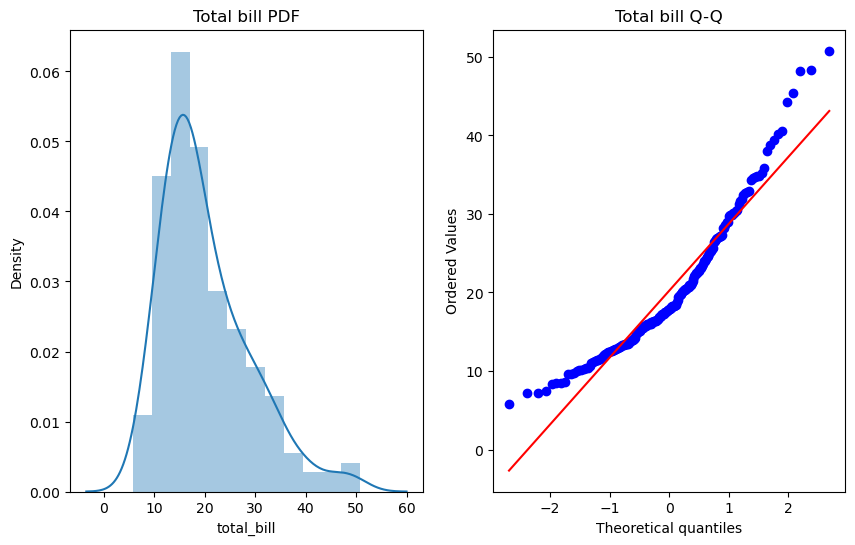

In [28]:
plt.figure(figsize=(10,6))
plt.subplot(121)
sns.distplot(X_train['total_bill'] )
plt.title("Total bill PDF")


plt.subplot(122)
stats.probplot(X_train['total_bill'] , dist='norm',plot=plt)
plt.title("Total bill Q-Q")

plt.show()

In [15]:
# plt.figure(figsize=(14,4))
# plt.subplot(121)
# sns.distplot(X_train['Age'])
# plt.title('Age PDF')

# plt.subplot(122)
# stats.probplot(X_train['Age'], dist="norm", plot=plt)
# plt.title('Age QQ Plot')

# plt.show()

In [16]:
# plt.figure(figsize=(14,4))
# plt.subplot(121)
# sns.distplot(X_train['Fare'])
# plt.title('Age PDF')

# plt.subplot(122)
# stats.probplot(X_train['Fare'], dist="norm", plot=plt)
# plt.title('Age QQ Plot')

# plt.show()

C:\Users\zeesh\AppData\Local\Temp\ipykernel_1288\3056350648.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['size'] )


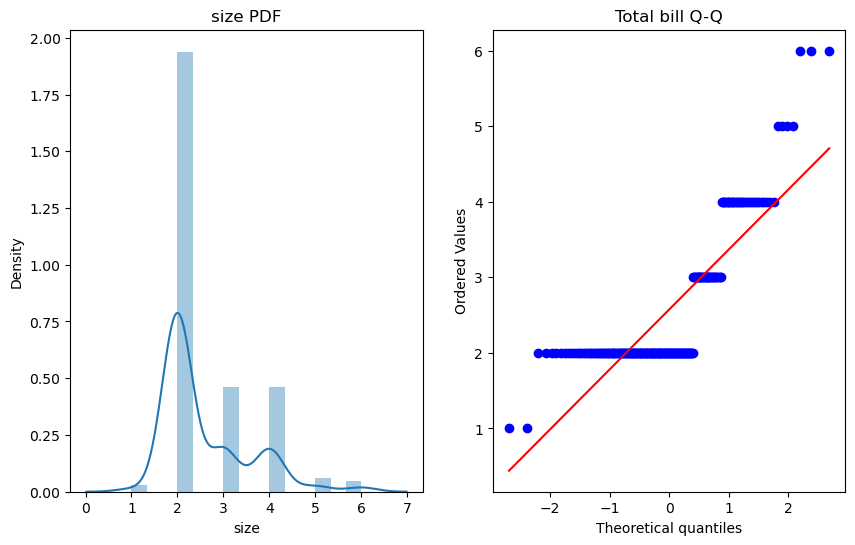

In [29]:
plt.figure(figsize=(10,6))
plt.subplot(121)
sns.distplot(X_train['size'] )
plt.title("size PDF")


plt.subplot(122)
stats.probplot(X_train['size'] , dist='norm',plot=plt)
plt.title("Total bill Q-Q")

plt.show()

In [30]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [31]:
clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)
    
y_pred = clf.predict(X_test)
y_pred1 = clf2.predict(X_test)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.6938775510204082
Accuracy DT 0.673469387755102


In [247]:
trf = FunctionTransformer(func=np.log1p)

In [32]:
tf = FunctionTransformer(func=np.log1p)

In [37]:
X_train_transformed = tf.fit_transform(X_train)
X_test_transformed = tf.transform(X_test)

In [34]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed,y_train)
clf2.fit(X_train_transformed,y_train)
    
y_pred = clf.predict(X_test_transformed)
y_pred1 = clf2.predict(X_test_transformed)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.7142857142857143
Accuracy DT 0.673469387755102


In [39]:
X_transformed = tf.fit_transform(x)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed,y,scoring='accuracy',cv=10)))

LR 0.6508333333333333
DT 0.479


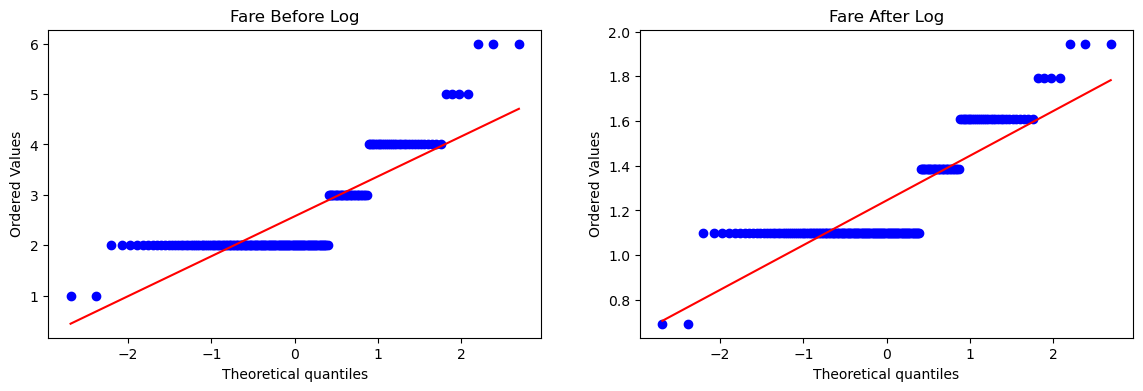

In [42]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['size'], dist="norm", plot=plt)
plt.title('Fare Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['size'], dist="norm", plot=plt)
plt.title('Fare After Log')

plt.show()

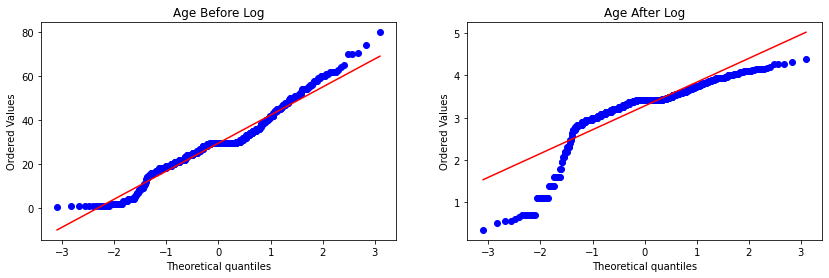

In [252]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Age'], dist="norm", plot=plt)
plt.title('Age After Log')

plt.show()

In [253]:
trf2 = ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.transform(X_test)

In [254]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed2,y_train)
clf2.fit(X_train_transformed2,y_train)
    
y_pred = clf.predict(X_test_transformed2)
y_pred2 = clf2.predict(X_test_transformed2)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred2))

Accuracy LR 0.6703910614525139
Accuracy DT 0.659217877094972


In [255]:
X_transformed2 = trf2.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed2,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed2,y,scoring='accuracy',cv=10)))

LR 0.6712609238451936
DT 0.6599750312109862


In [234]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]
    
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()
    

Accuracy 0.6195131086142323


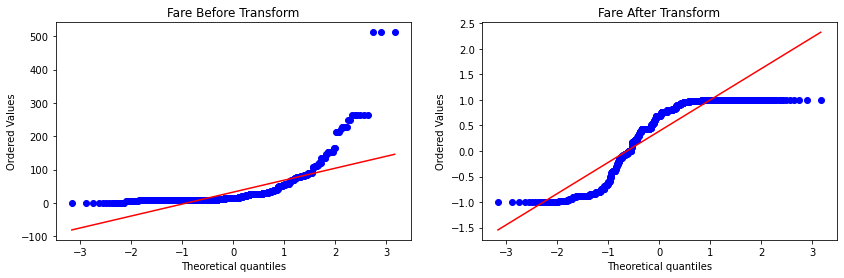

In [265]:
apply_transform(np.sin)